In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [208]:
def cartesianToSpherical(points):
    """
    Convert a point from cartesian coordinates to
    generalized spherical coordinates.

    The input cartesian coordinates should follow the order:
        (x, y, ...)

    The output spherical coordinates will follow the order:
        (r, t_1, t_2, t_3, ..., p)

    where `r` is the radius, the angles `t_i` are bounded between
    `[0, pi]`, and the angle p is bounded between `[0, 2pi]`.

    Parameters
    ----------
    points : numpy.ndarray[d] or numpy.ndarray[N,d]
        One or multiple sets of points in cartesian coordinates.

    Returns
    -------
    cartesianPoints : numpy.ndarray[d] or numpy.ndarray[N,d]
        Output always matches the shape of the input `points`.

    """
    nPoints = np.shape(points)[0] if len(np.shape(points)) > 1 else 1
    dim = np.shape(points)[-1]

    if nPoints == 1 and len(np.shape(points)) == 1:
        arrPoints = np.array([points])
    else:
        arrPoints = np.array(points)

    # See note about this roll in sphericalToCartesian function.
    # It is to make sure the points can come in as (x,y,z...)
    if dim >= 3:
        arrPoints = np.roll(arrPoints, 1, axis=-1)

    sphericalPoints = np.zeros((nPoints, dim))
    # See the page on n-spheres for these equations:
    # https://en.wikipedia.org/wiki/N-sphere#Spherical_coordinates
    # Radius
    sphericalPoints[:,0] = np.sqrt(np.sum(arrPoints**2, axis=-1))
    for i in range(1, dim-1):
        sphericalPoints[:,i] = np.arctan2(np.sqrt(np.sum(arrPoints[:,i:]**2, axis=-1)), arrPoints[:,i-1])
    # The unique angle
    sphericalPoints[:,-1] = np.arctan2(arrPoints[:,-1], arrPoints[:,-2])

    # Remove extra dimensions if you only have a single point
    return sphericalPoints[0] if (nPoints == 1 and len(np.shape(points)) == 1) else sphericalPoints
   

def sphericalToCartesian(points):
    """
    Convert a point from generalized spherical coordinates to
    cartesian coordinates.

    The input spherical coordinates should follow the order:
        (r, t_1, t_2, t_3, ..., p)

    where `r` is the radius, the angles `t_i` are bounded between
    `[0, pi]`, and the angle p is bounded between `[0, 2pi]`.

    This transformation is consistent in 2D with:
        (r cos(p), r sin(p))
    and in 3D with:
        (r sin(t) cos(p), r sin(t) sin(p), r cos(t))
        
    Parameters
    ----------
    points : numpy.ndarray[d] or numpy.ndarray[N,d]
        One or multiple sets of points in spherical coordinates.

    Returns
    -------
    cartesianPoints : numpy.ndarray[d] or numpy.ndarray[N,d]
        Output always matches the shape of the input `points`.
    """
    nPoints = np.shape(points)[0] if len(np.shape(points)) > 1 else 1
    dim = np.shape(points)[-1]

    if nPoints == 1 and len(np.shape(points)) == 1:
        arrPoints = np.array([points])
    else:
        arrPoints = np.array(points)

    cartesianPoints = np.zeros((nPoints, dim))
    for i in range(dim-1):
        cartesianPoints[:,i] = arrPoints[:,0] * np.product(np.sin(arrPoints[:,1:i+1]), axis=-1) * np.cos(arrPoints[:,i+1])
    # The last one is different
    cartesianPoints[:,-1] = arrPoints[:,0] * np.product(np.sin(arrPoints[:,1:]), axis=-1)

    # For some reason, the calculation above shifts the order of
    # the cartesian components by one IF the dimension is greater than 3...
    # I really don't know why, but adding this line (and a complementary one
    # in sphericalToCartesian) makes sure that we always have the order
    # (x,y,z...)
    if dim >= 3:
        cartesianPoints = np.roll(cartesianPoints, -1, axis=-1)
    
    # Remove extra dimensions if you only have a single point
    return cartesianPoints[0] if (nPoints == 1 and len(np.shape(points)) == 1) else cartesianPoints


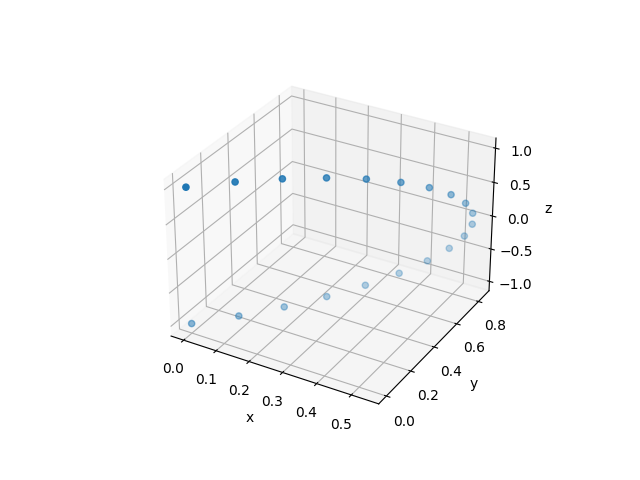

In [212]:
%matplotlib widget
for _ in range(10):
    plt.close()

tArr = np.linspace(0, np.pi, 20)
pArr = np.ones(len(tArr))
rArr = np.ones(len(tArr))
sphericalPoints = np.array(list(zip(rArr, tArr, pArr)))

cartesianPoints = sphericalToCartesian(sphericalPoints)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(*cartesianPoints.T)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [215]:
point = [1, np.pi/2, 0]
t = point[1]
p = point[2]

dir = np.array([np.sin(t)*np.cos(p),
                            np.sin(t)*np.sin(p),
                            np.cos(t)])

print(point)
print(dir)
print(sphericalToCartesian(point))
print(cartesianToSpherical(sphericalToCartesian(point)))

[1, 1.5707963267948966, 0]
[1.000000e+00 0.000000e+00 6.123234e-17]
[1.000000e+00 0.000000e+00 6.123234e-17]
[1.         1.57079633 0.        ]


In [216]:
point = [1, np.pi/2]

dir = np.array([np.cos(point[1]), np.sin(point[1])])

print(point)
print(dir)
print(sphericalToCartesian(point))
print(cartesianToSpherical(sphericalToCartesian(point)))

[1, 1.5707963267948966]
[6.123234e-17 1.000000e+00]
[6.123234e-17 1.000000e+00]
[1.         1.57079633]


In [217]:
for i in range(5):
    d = i+2
    point = np.random.uniform(1, 2, size=d)

    print(f'd = {d}')
    print(f'spherical: {point}')
    print(f'spherical -> cart: {sphericalToCartesian(point)}')
    print(f'spherical -> cart -> spherical: {cartesianToSpherical(sphericalToCartesian(point))}\n')

    print(f'cart: {point}')
    print(f'cart -> spherical: {cartesianToSpherical(point)}')
    print(f'cart -> spherical -> cart: {sphericalToCartesian(cartesianToSpherical(point))}\n\n')


d = 2
spherical: [1.65258705 1.19815487]
spherical -> cart: [0.60166872 1.53916819]
spherical -> cart -> spherical: [1.65258705 1.19815487]

cart: [1.65258705 1.19815487]
cart -> spherical: [2.04122979 0.6273198 ]
cart -> spherical -> cart: [1.65258705 1.19815487]


d = 3
spherical: [1.47167043 1.14851515 1.57773762]
spherical -> cart: [-0.00931787  1.34236125  0.60315281]
spherical -> cart -> spherical: [1.47167043 1.14851515 1.57773762]

cart: [1.47167043 1.14851515 1.57773762]
cart -> spherical: [2.44420885 0.86911814 0.66268488]
cart -> spherical -> cart: [1.47167043 1.14851515 1.57773762]


d = 4
spherical: [1.74430999 1.74532252 1.13112322 1.65471747]
spherical -> cart: [ 0.73117585 -0.13029668  1.54896187 -0.30288468]
spherical -> cart -> spherical: [1.74430999 1.74532252 1.13112322 1.65471747]

cart: [1.74430999 1.74532252 1.13112322 1.65471747]
cart -> spherical: [3.17904037 1.02334997 0.87290561 0.57503019]
cart -> spherical -> cart: [1.74430999 1.74532252 1.13112322 1.654717